# Original Code for the Completion of Project 2

Group 10

Project 1 Leader: Carson Crenshaw

Members: Sujith Panchumarthy, Zoe Averill

DS 4002

Last Updated: 10/22/2023

### Standard Imports

In [1]:
#Standard imports
import pandas as pd
import numpy as np
from google.colab import files

## MediaPipe

#### The following code is an adaption of [this](https://developers.google.com/mediapipe/solutions/vision/object_detector/python) guide and [this](https://colab.research.google.com/github/googlesamples/mediapipe/blob/main/examples/object_detection/python/object_detector.ipynb) example code for object detection using MediaPipe.

### Installs and Imports

In [2]:
#Install MediaPipe library
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 35.1 MB/s eta 0:00:00


In [3]:
#Image displaying imports
import cv2
from google.colab.patches import cv2_imshow

#Object detection imports
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [17]:
#Filepath for downloaded MediaPipe "EfficientDet-Lite2 (int8)" model
model_path = "/content/efficientdet_lite2.tflite"

###Detection Model: Single Images with Single Items

In [55]:
#Image uploads
#Select all images from computer files
uploaded = files.upload()

for filename in uploaded:
  content = uploaded[filename]
  with open(filename, 'wb') as f:
    f.write(content)

#Record all image filenames
filenames = []
for filename in uploaded:
  print(filename)
  filenames.append(filename)

Saving Project 2 DS4002.jpeg to Project 2 DS4002.jpeg
Project 2 DS4002.jpeg


In [56]:
#Function for outlining and displaying the detected objects in an image
MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:
    #Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    #Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

In [57]:
#Create an ObjectDetector object
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

In [58]:
#Dataframe to store initial, single item, detection results (NOT for basket images with multiple items)
accuracyDF = pd.DataFrame(columns=["File Name","Object","Detected?","Confidence","Accepted?"])

#Loop through uploaded files
for IMAGE_FILE in filenames:
  #Load the input image
  image = mp.Image.create_from_file(IMAGE_FILE)

  #Detect objects in the input image
  detection_result = detector.detect(image)

  #Get object name for accuracy calculations
  objectName = IMAGE_FILE.rsplit("_")[0]

  #Flag to check if object is detected
  flag = False
  #If objects are detected, loop through then
  if len(detection_result.detections) > 0:
    for detection in detection_result.detections:
      #If object is correctly detected, check confidence
      if objectName == detection.categories[0].category_name:
        #Mark that object was detected
        flag = True
        #If confidence is greater than or equal to 75%, object is considered detected
        if detection.categories[0].score >= 0.75:
          row = [IMAGE_FILE,objectName,"Yes",detection.categories[0].score,"Yes"]
          break
        #If confidence is less than than 75%, object is NOT considered detected
        else:
          row = [IMAGE_FILE,objectName,"Yes",detection.categories[0].score,"No"]
          break

  #If no objects were detected or none of the detected objects were the object, record that object wasn't detected
  if flag == False:
    row = [IMAGE_FILE,objectName,"No",np.nan,np.nan]

  #Append row to accuracy df
  accuracyDF.loc[len(accuracyDF)] = row

In [47]:
accuracyDF

,File Name,Object,Detected?,Confidence,Accepted?
0,applesandoranges (1).jpeg,applesandoranges (1).jpeg,No,NaN,NaN


In [ ]:
#Exporting accuracy df
accuracyDF.to_csv('accuracy.csv', index=False)

###Detection Model: Single Images with Multiple Items

In [60]:
#Image uploads
#Select all images from computer files
uploaded = files.upload()

for filename in uploaded:
  content = uploaded[filename]
  with open(filename, 'wb') as f:
    f.write(content)

#Record all image filenames
filenames = []
for filename in uploaded:
  print(filename)
  filenames.append(filename)

Saving Project 2 DS4002.jpeg to Project 2 DS4002 (1).jpeg
Project 2 DS4002 (1).jpeg


In [61]:
#Function for outlining and displaying the detected objects in an image
MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:
    #Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    #Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

In [62]:
#Create an ObjectDetector object
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

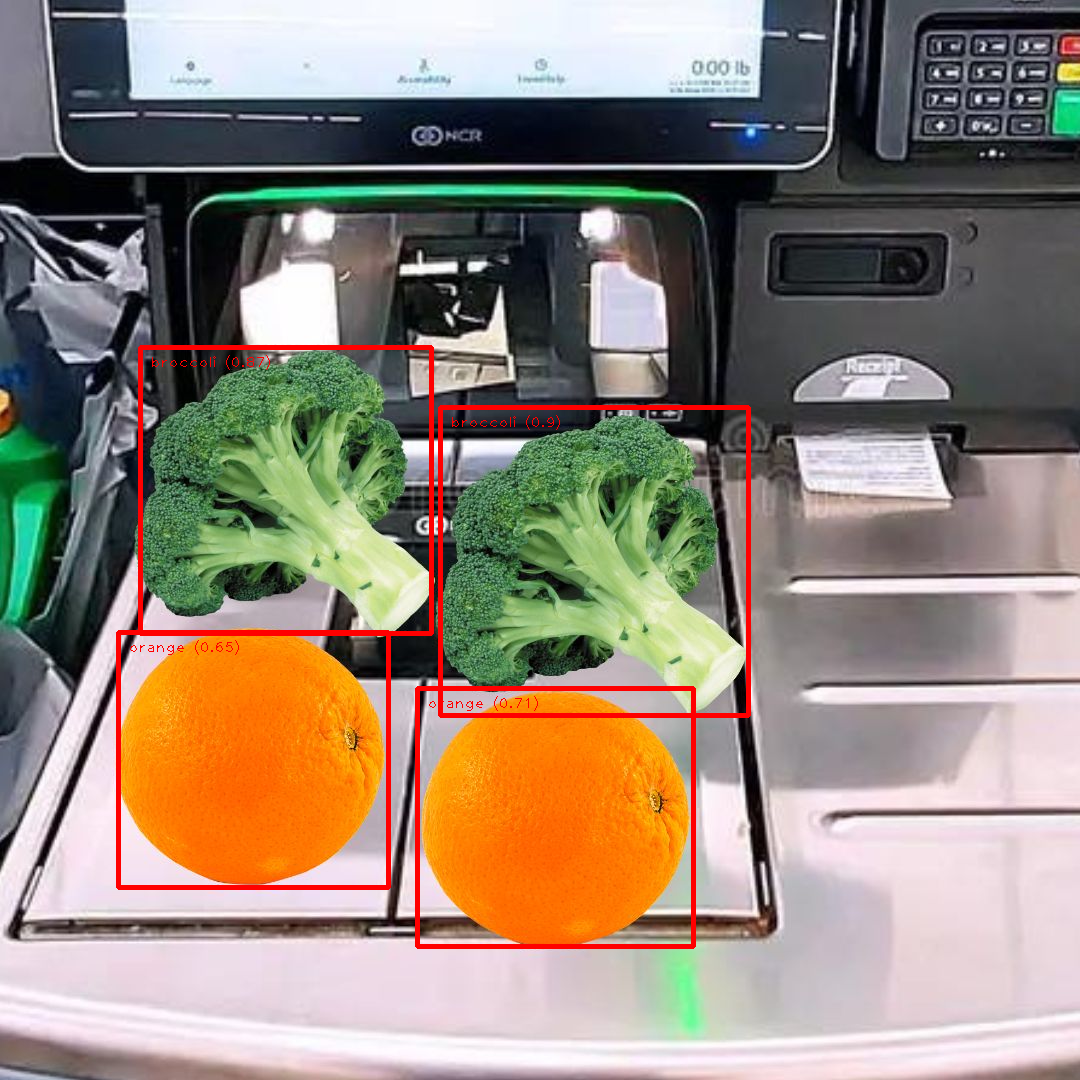

In [63]:
#Load the input image
image = mp.Image.create_from_file("Project 2 DS4002.jpeg")

#Detect objects in the input image
detection_result = detector.detect(image)

#Display the detection result
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_annotated_image)